In [20]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [21]:
cc_data = pd.read_excel('dataset_ClimateChange/climate_change_dataset.xlsx')
cc_data.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,..,..,..,..,..,..,..,..,..


Convert the excel data to long format and clean raw value

In [22]:
year_cols = [c for c in cc_data.columns if str(c).isdigit()]
long_cc_data = cc_data.melt(
    id_vars=["Country code", "Country name", "Series code", "Series name"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Value"
)
long_cc_data["Year"] = pd.to_numeric(long_cc_data["Year"], errors="coerce")
long_cc_data["Value"] = pd.to_numeric(long_cc_data["Value"].replace("..", np.nan), errors="coerce")
print("Long shape:", long_cc_data.shape)
long_cc_data.head(200)

Long shape: (297264, 6)


,Country code,Country name,Series code,Series name,Year,Value
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,29.574810
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,0.000000
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,0.000000
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,0.208235
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,4.967875
...,...,...,...,...,...,...
195,SVN,Slovenia,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,0.204426
196,SWE,Sweden,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,1.528626
197,SWZ,Swaziland,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,0.000000
198,SXM,Sint Maarten (Dutch part),AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,NaN


In [23]:
codes_needed = ["NY.GDP.MKTP.CD", "SP.POP.TOTL", "EG.USE.PCAP.KG.OE", "EN.ATM.CO2E.PC"]
filtered = long_cc_data[long_cc_data["Series code"].isin(codes_needed)].copy()
data = filtered.pivot_table(
    index=["Country code", "Country name", "Year"],
    columns="Series code",
    values="Value"
).reset_index()
data.columns.name = None
print("Wide shape:", data.shape)
data.head()

Wide shape: (4877, 7)


,Country code,Country name,Year,EG.USE.PCAP.KG.OE,EN.ATM.CO2E.PC,NY.GDP.MKTP.CD,SP.POP.TOTL
0,ABW,Aruba,1990,NaN,29.620641,NaN,62147.0
1,ABW,Aruba,1991,NaN,29.838835,8.720670e+08,64642.0
2,ABW,Aruba,1992,NaN,25.239288,9.586592e+08,68286.0
3,ABW,Aruba,1993,NaN,24.405233,1.083240e+09,72573.0
4,ABW,Aruba,1994,NaN,22.977867,1.245810e+09,76762.0


In [24]:

data = data.rename(columns={
    "NY.GDP.MKTP.CD": "GDP",
    "SP.POP.TOTL": "Population",
    "EG.USE.PCAP.KG.OE": "EnergyUse_perCapita",
    "EN.ATM.CO2E.PC": "CO₂ emissions per capita"
})
print(data.shape)
data.head()

(4877, 7)


,Country code,Country name,Year,EnergyUse_perCapita,CO₂ emissions per capita,GDP,Population
0,ABW,Aruba,1990,NaN,29.620641,NaN,62147.0
1,ABW,Aruba,1991,NaN,29.838835,8.720670e+08,64642.0
2,ABW,Aruba,1992,NaN,25.239288,9.586592e+08,68286.0
3,ABW,Aruba,1993,NaN,24.405233,1.083240e+09,72573.0
4,ABW,Aruba,1994,NaN,22.977867,1.245810e+09,76762.0


In [25]:
data_cleaned = data.dropna(how='any')
data_cleaned = data_cleaned.reset_index(drop=True)
print("Before cleaning:", len(data), "rows")
print("After cleaning:", len(data_cleaned), "rows")
data_cleaned.head(200)

Before cleaning: 4877 rows
After cleaning: 2847 rows


,Country code,Country name,Year,EnergyUse_perCapita,CO₂ emissions per capita,GDP,Population
0,AGO,Angola,1990,569.242999,0.428613,1.026019e+10,10335052.0
1,AGO,Angola,1991,565.451027,0.409949,1.219375e+10,10653515.0
2,AGO,Angola,1992,550.548264,0.401597,5.779394e+09,11002910.0
3,AGO,Angola,1993,551.688878,0.510141,5.285600e+09,11371750.0
4,AGO,Angola,1994,541.553067,0.331321,4.059577e+09,11742960.0
...,...,...,...,...,...,...,...
195,BGD,Bangladesh,1994,126.988772,0.164867,3.376866e+10,115059015.0
196,BGD,Bangladesh,1995,135.307621,0.194201,3.793975e+10,117486952.0
197,BGD,Bangladesh,1996,133.336186,0.200368,4.066602e+10,119928682.0
198,BGD,Bangladesh,1997,136.512119,0.204820,4.231880e+10,122370403.0


In [26]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country code              2847 non-null   object 
 1   Country name              2847 non-null   object 
 2   Year                      2847 non-null   int64  
 3   EnergyUse_perCapita       2847 non-null   float64
 4   CO₂ emissions per capita  2847 non-null   float64
 5   GDP                       2847 non-null   float64
 6   Population                2847 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 155.8+ KB


In [27]:
numdata_cleaned = pd.DataFrame(data_cleaned[['EnergyUse_perCapita', 'CO₂ emissions per capita', 'GDP', 'Population']])
numdata_cleaned.head()

,EnergyUse_perCapita,CO₂ emissions per capita,GDP,Population
0,569.242999,0.428613,1.026019e+10,10335052.0
1,565.451027,0.409949,1.219375e+10,10653515.0
2,550.548264,0.401597,5.779394e+09,11002910.0
3,551.688878,0.510141,5.285600e+09,11371750.0
4,541.553067,0.331321,4.059577e+09,11742960.0


In [28]:
numdata_cleaned.describe()

,EnergyUse_perCapita,CO₂ emissions per capita,GDP,Population
count,2847.000000,2847.000000,2.847000e+03,2.847000e+03
mean,2238.299756,5.430261,8.629264e+11,2.121387e+08
std,2644.346007,7.036070,3.858594e+12,7.756942e+08
min,40.757611,-0.251051,2.841386e+07,1.508900e+04
25%,557.969342,0.957830,6.939339e+09,3.781180e+06
50%,1199.214267,3.370441,2.966361e+10,1.055300e+07
75%,3022.845293,7.614166,2.023476e+11,4.777195e+07
max,23599.084662,68.626180,5.580488e+13,6.610030e+09


C:\Users\butac\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\butac\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


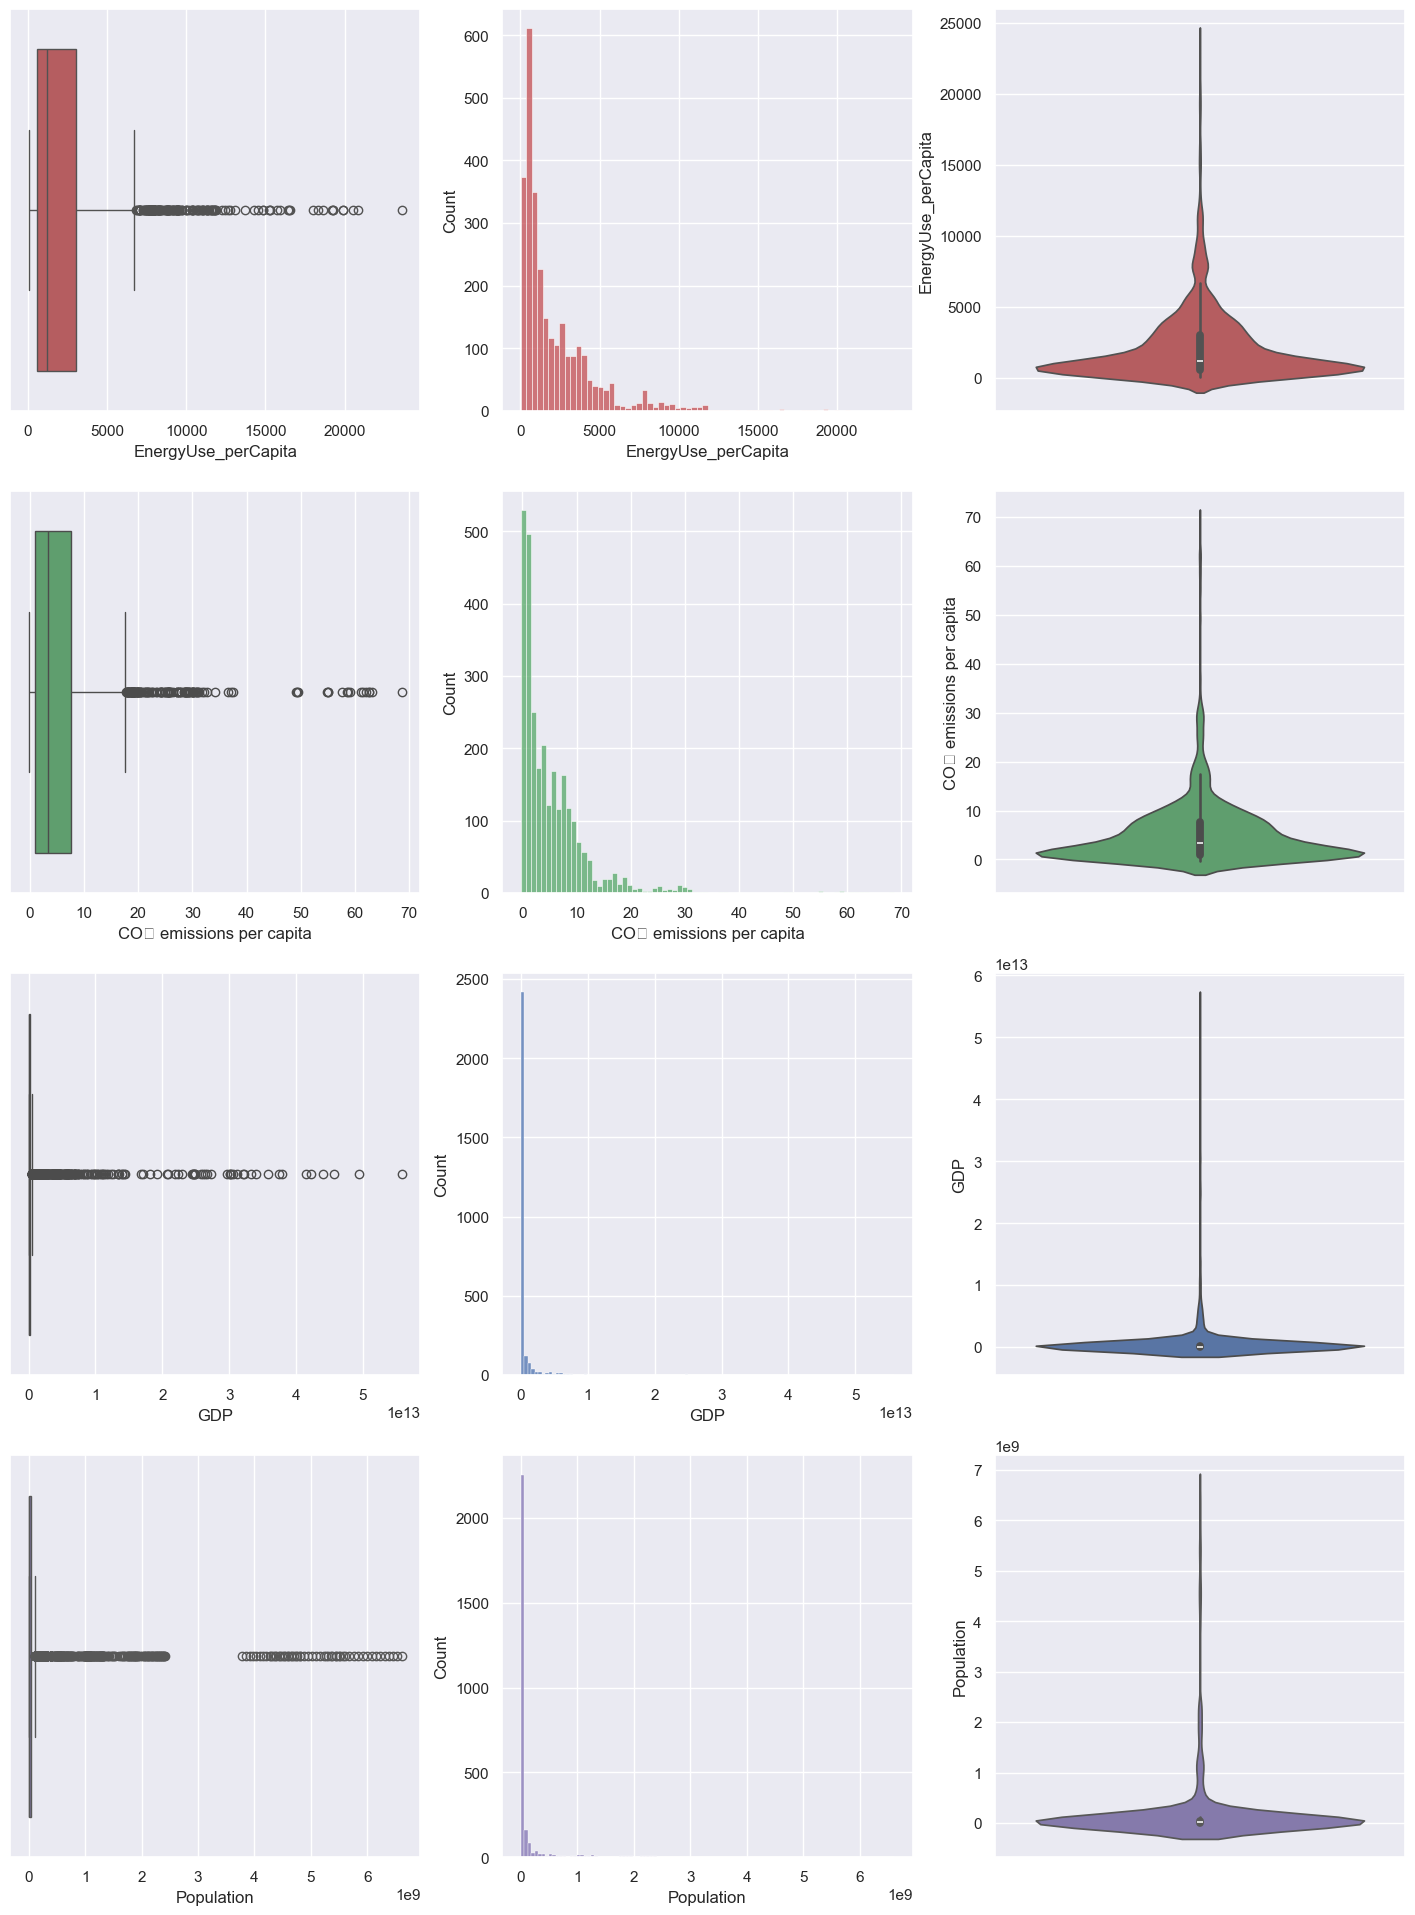

In [29]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m"]

count = 0
for var in numdata_cleaned:
    sb.boxplot(numdata_cleaned[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(numdata_cleaned[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(numdata_cleaned[var], color = colors[count], ax = axes[count,2])
    count += 1

#### Apply logarithmic transformation before plotting. This compresses big numbers and spreads small ones.

In [30]:
# Create a log-transformed version of numeric data
numdata_log = numdata_cleaned.copy()
for col in numdata_log.columns:
    numdata_log[col] = np.log10(numdata_log[col] + 1)  # +1 avoids log(0)

C:\Users\butac\AppData\Local\Temp\ipykernel_9824\2128242632.py:17: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\butac\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


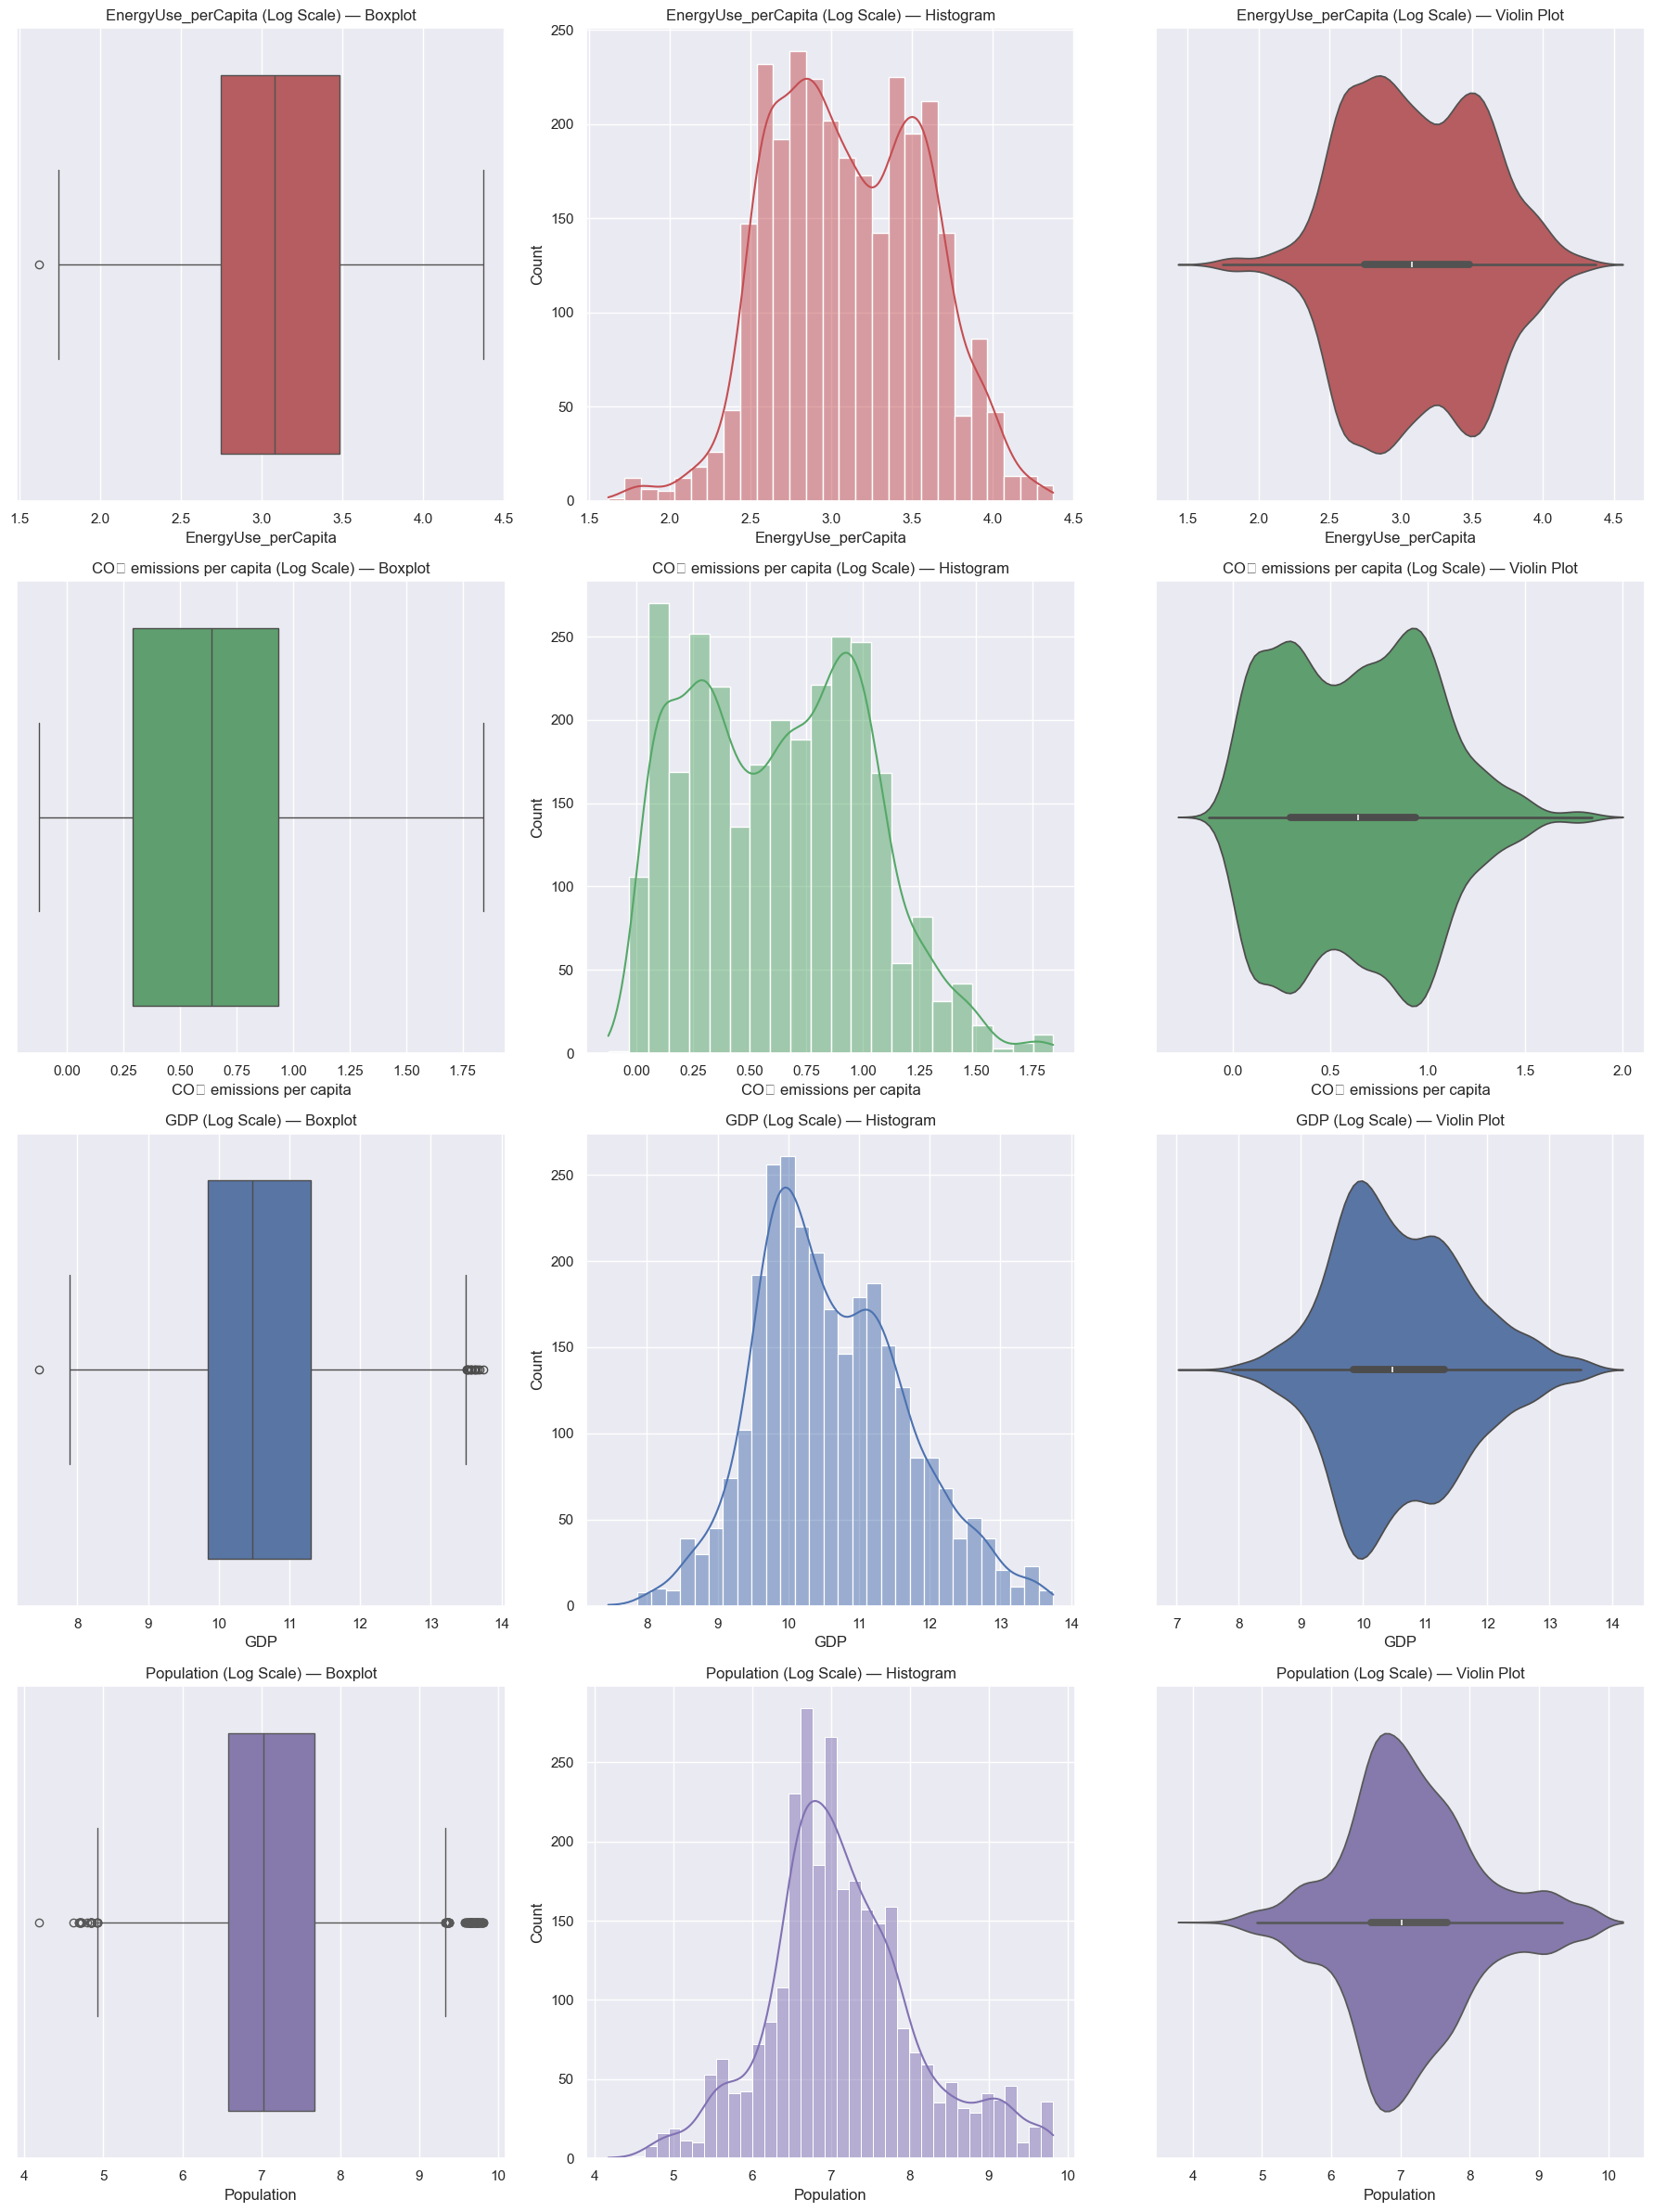

In [31]:
num_vars = numdata_log.select_dtypes(include=np.number).columns.tolist()
rows = len(num_vars)

f, axes = plt.subplots(rows, 3, figsize=(18, 6*rows))
colors = ["r", "g", "b", "m"]

for i, var in enumerate(num_vars):
    color = colors[i % len(colors)]
    sb.boxplot(x=numdata_log[var], orient="h", color=color, ax=axes[i,0])
    sb.histplot(numdata_log[var], color=color, ax=axes[i,1], kde=True)
    sb.violinplot(x=numdata_log[var], color=color, ax=axes[i,2])
    
    axes[i,0].set_title(f"{var} (Log Scale) — Boxplot")
    axes[i,1].set_title(f"{var} (Log Scale) — Histogram")
    axes[i,2].set_title(f"{var} (Log Scale) — Violin Plot")

plt.tight_layout()
plt.show()

| Variable                  | Shape (log scale)             | Insight   |
| :--------------          | :--------------------------- | :---------------------------   |
| GDP                       | ~Normal / slight right-skew   | Economies vary log-normally; few big economies dominate|
| Population                | Right-skewed                  | Majority small nations; few mega countries|
| Energy Use per Capita     | ~Normal                       | Developed vs developing split|
| CO₂ Emissions per Capita  | Right-skewed                  | Pollution inequality; efficiency differences|
 

                          EnergyUse_perCapita  CO₂ emissions per capita  \
EnergyUse_perCapita                  1.000000                  0.949826   
CO₂ emissions per capita             0.949826                  1.000000   
GDP                                  0.440470                  0.405886   
Population                          -0.098760                 -0.130127   

                               GDP  Population  
EnergyUse_perCapita       0.440470   -0.098760  
CO₂ emissions per capita  0.405886   -0.130127  
GDP                       1.000000    0.779604  
Population                0.779604    1.000000  


c:\Users\butac\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.draw()


<Axes: >

C:\Users\butac\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\butac\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


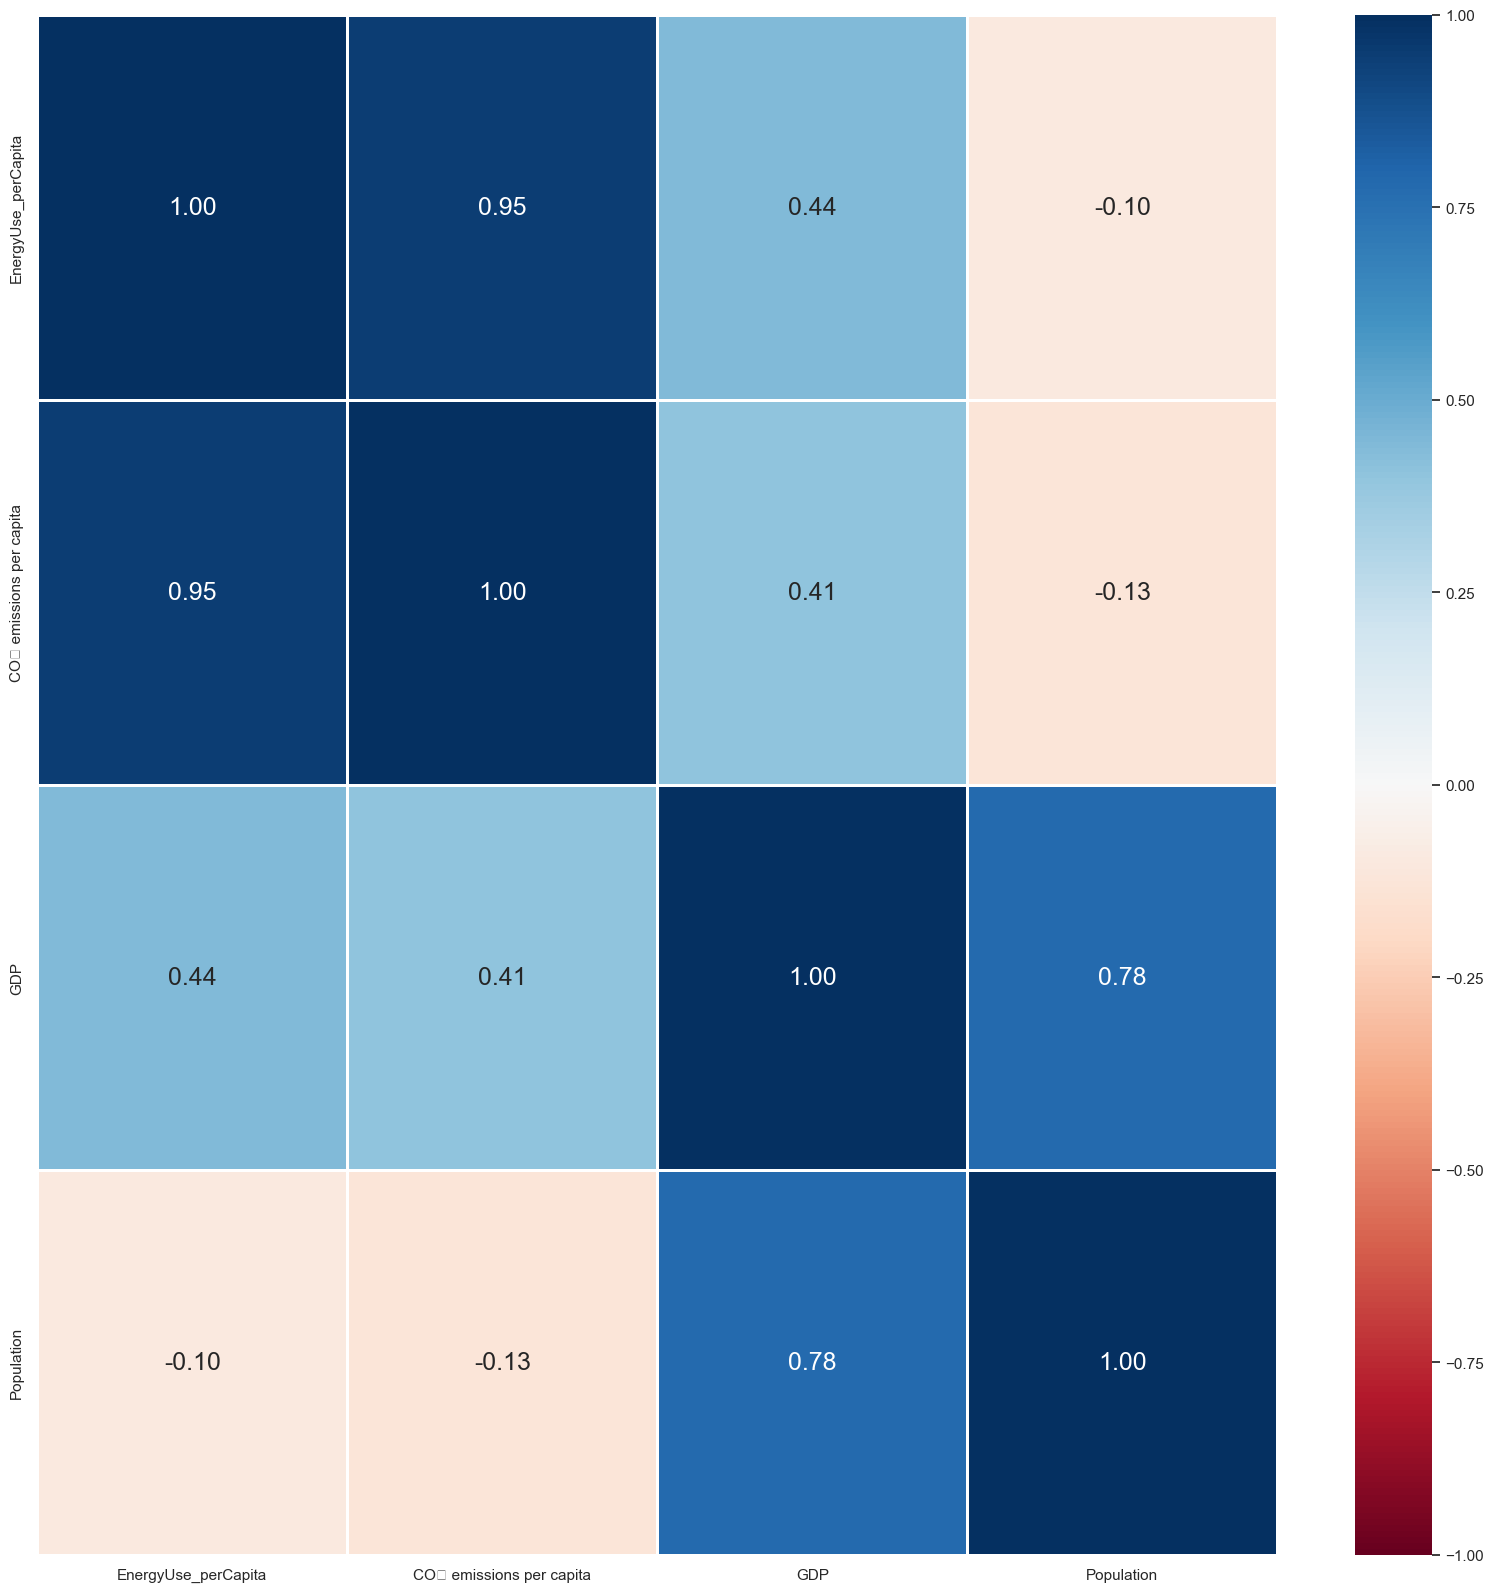

In [32]:
# Correlation Matrix
print(numdata_log.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(numdata_log.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

Insights:
1) Weak correlation between GDP and energy use (r = 0.08) shows that high economic output doesn’t automatically mean efficient energy use.
2) Very strong link between energy use and CO₂ emissions (r = 0.93).

| Variable                  | Correlation (r)            | Interpretation   |
| :--------------          | :--------------------------- | :---------------------------   |
| EnergyUse_perCapita ↔ CO₂_Emissions_perCapita            | +0.95 (very strong)  | Countries using more energy per person emit more CO₂ — energy use is still fossil-fuel dominated.|
| GDP ↔ EnergyUse_perCapita        | +0.44 (moderate)       | Economic output increases with energy use; developed nations consume more per person.|
| GDP ↔ CO₂_Emissions_perCapita    | +0.41 (moderate)       | Richer economies emit more, but less strongly than energy–CO₂ link → early evidence of cleaner growth.|
|GDP ↔ Population  | +0.78 (strong)                 | Larger countries tend to have higher total GDP — size drives economic scale.|
|Population ↔ EnergyUse_perCapita  |–0.10 (weak negative)                 | More populated countries use less energy per person.|
|Population ↔ CO₂_Emissions_perCapita  | –0.13 (weak negative)                 | High-population countries emit less CO₂ per person (e.g., China vs. small developed nations).|
 

## KEY FINDINGS
1. Energy drives emissions

   The near-perfect correlation (r = 0.95) confirms that CO₂ emissions mainly result from energy consumption.

   Suggests the need for cleaner energy sources (renewables) to break this link.

2. Economic growth still linked to energy

   The moderate GDP–energy correlation (r = 0.44) shows that higher income nations still depend on energy use for growth — but efficiency varies by        country.

   Some economies generate more GDP per unit of energy (e.g., Singapore, Switzerland), indicating higher energy productivity.

3. Decoupling trend (cleaner growth)

   GDP–CO₂ correlation (r = 0.41) is lower than energy–CO₂ (r = 0.95).
   Meaning: Some countries have achieved economic growth without proportional CO₂ increases — a sign of partial decoupling and true energy efficiency      improvement.

4. Population moderates intensity

   Weak negative correlation with population implies that smaller, high-income countries consume and emit more per capita, while large developing          countries distribute emissions across larger populations.